In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'PACKAGE')

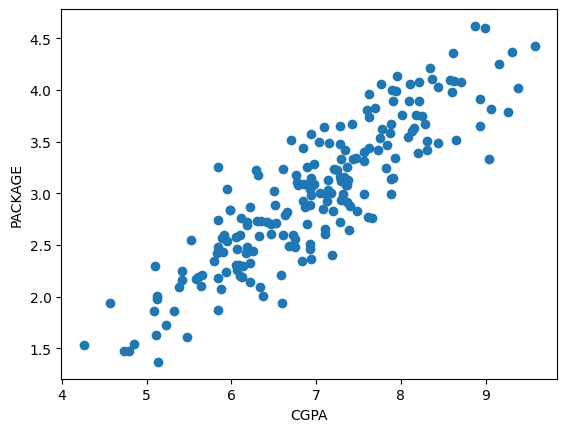

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [15]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [16]:
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [17]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'PACKAGE')

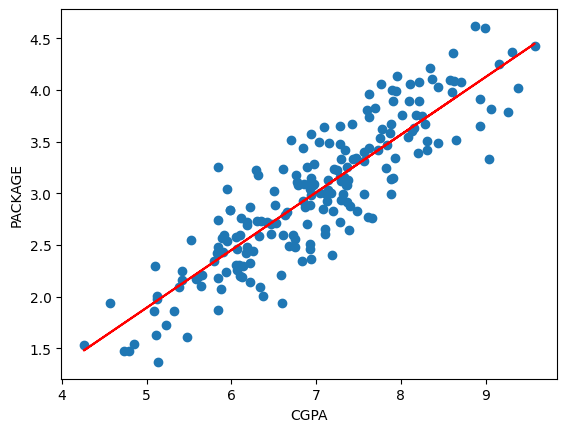

In [22]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
Y_pred = lr.predict(X_test)

In [27]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [32]:
print("MAE",mean_absolute_error(Y_test,Y_pred))#in lpa

MAE 0.2884710931878175


In [33]:
print("MSE",mean_squared_error(Y_test,Y_pred))#in lpa^2

MSE 0.12129235313495527


In [34]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))#in lpa

RMSE 0.34827051717731616


In [37]:
print("R2 SCORE",r2_score(Y_test,Y_pred))#able to explain 78% of variance
r2 = r2_score(Y_test,Y_pred)

R2 SCORE 0.780730147510384


In [38]:
#Adjusted R2 score
X_test.shape

(40, 1)

In [39]:
1 -((1-r2) * (40-1) / (40-1-1))

0.7749598882343415

In [40]:
#adding irrelevant column
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.464081,3.26
1,5.12,0.340072,1.98
2,7.82,0.218346,3.25
3,7.42,0.407927,3.67
4,6.94,0.303703,3.57


Text(0, 0.5, 'package in lpa')

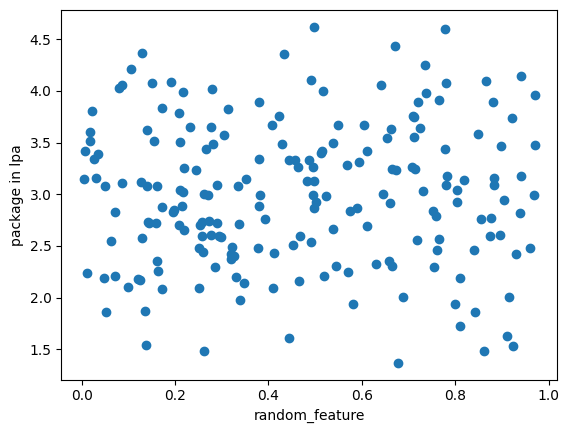

In [41]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package in lpa')

In [42]:
X = new_df1.iloc[:,0:2]
Y = new_df1.iloc[:,-1]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
lr = LinearRegression()

In [51]:
X_train.shape

(160, 2)

In [52]:
Y_train.shape

(160,)

In [53]:
lr.fit(X_train,Y_train)

LinearRegression()

In [54]:
Y_pred = lr.predict(X_test)

In [58]:
print('R2 score ',r2_score(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)


R2 score  0.7705953825240222


In [59]:
1 - ((1-r2) * (40-1) / (40-1-2))

0.758195132930726

In [60]:
#adding relevant column
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [61]:
new_df2.sample(5)

,cgpa,iq,package
39,7.43,3.33,3.33
198,7.63,3.96,3.96
50,9.58,3.73,4.43
105,6.66,1.62,2.82
26,8.31,4.42,3.42


Text(0, 0.5, 'PACKAGE')

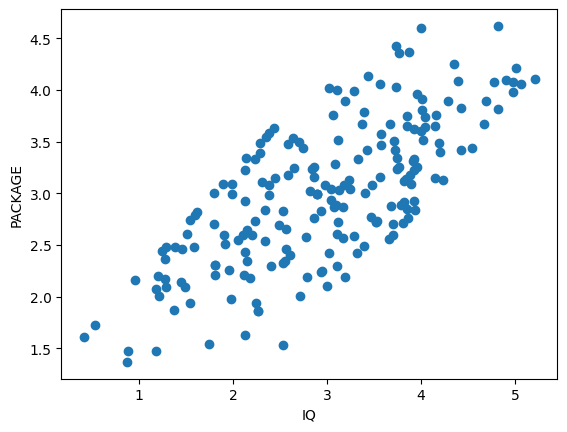

In [62]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('PACKAGE')

In [63]:
np.random.randint(-100,100)

-21

In [64]:
X = new_df2.iloc[:,0:2]
Y = new_df2.iloc[:,-1]

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [67]:
print('R2 score',r2_score(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)

R2 score 0.8322241409795422


In [68]:
1 - ((1-r2) * (40-1) / (40-1-2))

0.8231551756270851